<a href="https://colab.research.google.com/github/relew/matchPrediction/blob/master/Zoli_MatchPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
url = 'http://dataevents.hu/202303/filedataevents/competition_table.xlsx'

In [3]:
data = pd.read_excel(url)

In [4]:
data.head()

,match_id,season,div,odds_home_team_win,odds_draw,odds_away_team_win,home_team_match_nr,home_team_goal_roll1_sum,home_team_goal_roll2_sum,home_team_goal_roll3_sum,...,odds_away_team_draw_roll4_mean,odds_away_team_defeat_roll1_mean,odds_away_team_defeat_roll2_mean,odds_away_team_defeat_roll3_mean,odds_away_team_defeat_roll4_mean,away_team_point_mean,away_team_expected_point_mean,home_win_flag,draw_flag,away_win_flag
0,0,2008-2009,div0,1.73,3.5,5.00,5,3,7,8,...,3.825,11.00,7.665,6.377,5.908,0.500,3.0,0,0,1
1,1,2008-2009,div0,1.25,5.5,12.00,7,0,2,5,...,3.582,2.10,2.250,2.833,2.475,0.333,0.0,0,1,0
2,2,2008-2009,div0,1.57,3.8,5.75,9,1,4,4,...,3.525,6.75,4.275,3.883,3.638,0.750,1.5,1,0,0
3,3,2008-2009,div0,1.17,7.0,15.00,11,2,6,7,...,3.975,4.20,2.750,2.333,2.550,0.600,0.0,1,0,0
4,4,2008-2009,div0,1.17,7.0,15.00,14,2,4,7,...,3.925,3.10,2.175,2.050,2.015,0.833,0.0,1,0,0


In [5]:
data.shape

(64166, 167)

In [6]:
data.groupby("div").home_team_match_nr.describe()

,count,mean,std,min,25%,50%,75%,max
div,,,,,,,,
div0,3779.0,19.503308,8.655067,5.0,12.0,20.0,27.0,34.0
div1,4753.0,21.526404,9.800675,5.0,13.0,22.0,30.0,38.0
div10,1348.0,19.520030,8.645817,5.0,12.0,20.0,27.0,34.0
div11,1723.0,21.758561,9.997838,5.0,13.0,22.0,30.0,42.0
div12,1270.0,18.934646,8.438512,5.0,12.0,19.0,26.0,34.0
div13,1349.0,19.509266,8.653190,5.0,12.0,20.0,27.0,34.0
div14,710.0,19.100000,8.718275,5.0,12.0,19.0,26.0,36.0
div15,686.0,18.874636,8.810016,5.0,11.0,18.0,26.0,36.0
div16,681.0,18.885463,8.798652,5.0,11.0,18.0,26.0,36.0


In [7]:
all_cols = []
for item in data.columns:
  if "_roll" in item:
    value = item.split("_roll")[0]
    if value not in all_cols:
      all_cols.append(value)

In [8]:
def col_creator(data):
  used = []
  for item in data.columns:
    if "sum" in item:
      val = item.split("_roll")[0]
      if (val not in used) & ("sum" in item):
        used.append(val)
        color1 = val+"_roll1_sum"
        color2 = val+"_roll2_sum"
        color3 = val+"_roll3_sum"
        color4 = val+"_roll4_sum"
        sec = "second_match_"+val
        third = "third_match_"+val
        four = "forth_match_"+val
        data[sec] = data[color2] - data[color1] 
        data[third] = data[color3] - data[color1] - data[sec]
        data[four] = data[color4] - data[color1] - data[sec] - data[third]
      elif (val not in used) & ("mean" in item):
        color1 = val+"_roll1_mean"
        color2 = val+"_roll2_mean"
        color3 = val+"_roll3_mean"
        color4 = val+"_roll4_mean"
        sec = "second_match_"+val
        third = "third_match_"+val
        four = "forth_match_"+val
        data[sec] = data[color2] * 2 - data[color1] 
        data[third] = data[color3] * 3 - data[color1] - data[sec]
        data[four] = data[color4] * 4 - data[color1] - data[sec] - data[third]
  return data

In [9]:
data = col_creator(data)

In [10]:
data.columns

Index(['match_id', 'season', 'div', 'odds_home_team_win', 'odds_draw',
       'odds_away_team_win', 'home_team_match_nr', 'home_team_goal_roll1_sum',
       'home_team_goal_roll2_sum', 'home_team_goal_roll3_sum',
       ...
       'forth_match_away_team_red_card',
       'second_match_away_team_opponents_red_card',
       'third_match_away_team_opponents_red_card',
       'forth_match_away_team_opponents_red_card',
       'second_match_away_team_point', 'third_match_away_team_point',
       'forth_match_away_team_point', 'second_match_away_team_expected_point',
       'third_match_away_team_expected_point',
       'forth_match_away_team_expected_point'],
      dtype='object', length=263)

In [11]:
data["odds_diff"] = data["odds_home_team_win"] - data["odds_away_team_win"]
data["odds_diff"] = np.where(data["odds_diff"] > 10, 10, data["odds_diff"])
data["odds_diff"] = np.where(data["odds_diff"] < -10, -10, data["odds_diff"])

In [12]:
data["roundest"] = np.where(data["home_team_match_nr"] < data["away_team_match_nr"],data["home_team_match_nr"],np.where(data["home_team_match_nr"] > data["away_team_match_nr"], data["away_team_match_nr"],data["home_team_match_nr"]))
data["home_pos"] = data["home_team_point_mean"] / (data["roundest"] *3)
data["away_pos"] = data["away_team_point_mean"] / (data["roundest"] *3)

<ipython-input-12-86b0d7880c73>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["roundest"] = np.where(data["home_team_match_nr"] < data["away_team_match_nr"],data["home_team_match_nr"],np.where(data["home_team_match_nr"] > data["away_team_match_nr"], data["away_team_match_nr"],data["home_team_match_nr"]))
<ipython-input-12-86b0d7880c73>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["home_pos"] = data["home_team_point_mean"] / (data["roundest"] *3)
<ipython-input-12-86b0d7880c73>:3: PerformanceWarning: DataFrame 

In [13]:
# Seeing where team is located on table based on str....3 mean top team, 2 middle, 1 relegation pos
data["home_team_pos_str"] = np.where(data["home_pos"] > 0.075, 3, np.where(data["home_pos"] < 0.01, 1, 2))
data["away_team_pos_str"] = np.where(data["away_pos"] > 0.075, 3, np.where(data["away_pos"] < 0.01, 1, 2))

<ipython-input-13-3785d816dc1c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["home_team_pos_str"] = np.where(data["home_pos"] > 0.075, 3, np.where(data["home_pos"] < 0.01, 1, 2))
<ipython-input-13-3785d816dc1c>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["away_team_pos_str"] = np.where(data["away_pos"] > 0.075, 3, np.where(data["away_pos"] < 0.01, 1, 2))


In [14]:
data["Pos_diff"] = data["home_team_pos_str"] - data["away_team_pos_str"]

<ipython-input-14-a42c98bcd166>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["Pos_diff"] = data["home_team_pos_str"] - data["away_team_pos_str"]


In [15]:
def pos_multi(X):
  if pos_multi == 2:
    return 1.2
  elif pos_multi == 1:
    return 1.1
  elif pos_multi == -1:
    return 0.9
  elif pos_multi == -2:
    return 0.8
  else:
    return 1

In [16]:
data["multiplier"] = data.apply(lambda x: pos_multi(x), axis = 1)

In [18]:
data["Pos_diff_away"] = np.where(data["away_team_pos_str"] - data["home_team_pos_str"] == 2, 1.2, np.where(data["away_team_pos_str"] - data["home_team_pos_str"] == 1, 1.1, 0))

In [21]:
def col_changer(X):
  return (X["home_team_shot_roll4_sum"] + X["home_team_shot_on_target_roll4_sum"] + X["home_team_corner_roll4_sum"]) * X["multiplier"]

In [22]:
data["strength"] = data.apply(lambda x: col_changer(x), axis = 1)

In [23]:
data["away_strength"] = data["away_team_shot_roll4_sum"] + data["away_team_shot_on_target_roll4_sum"] + data["away_team_corner_roll4_sum"]

In [24]:
data["home_ratio"] = data["home_team_shot_roll4_sum"]/data["home_team_opponents_shot_roll4_sum"] + data["home_team_shot_on_target_roll4_sum"]/data["home_team_opponents_shot_on_target_roll4_sum"]+data["home_team_corner_roll4_sum"]/data["home_team_opponents_corner_roll4_sum"]

In [25]:
data["away_ratio"] = data["away_team_shot_roll4_sum"]/data["away_team_opponents_shot_roll4_sum"] + data["away_team_shot_on_target_roll4_sum"]/data["away_team_opponents_shot_on_target_roll4_sum"]+data["away_team_corner_roll4_sum"]/data["away_team_opponents_corner_roll4_sum"]

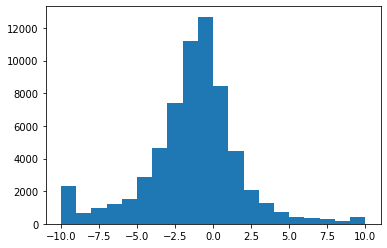

In [12]:
from pandas.core.describe import DataFrameDescriber
plt.hist(data["odds_diff"], bins = 20)
plt.show()

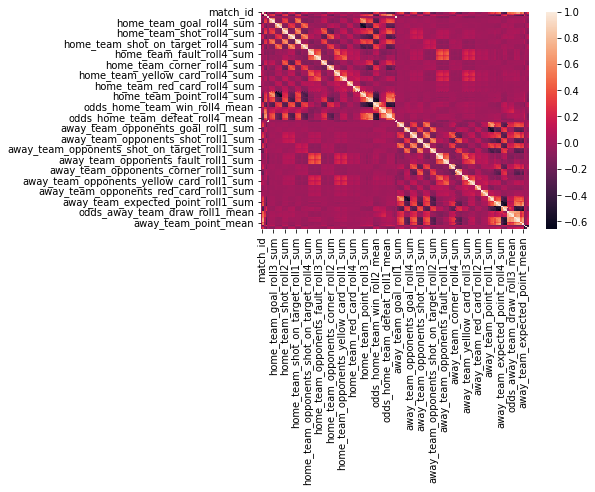

In [ ]:
sns.heatmap(data.corr())

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier()

In [39]:
MM = MinMaxScaler()
SS = StandardScaler()

In [77]:
y = data["home_win_flag"]
X = data.drop(["match_id", "div", "season", "draw_flag", "away_win_flag", "home_win_flag"], axis = 1).fillna(0)

In [84]:
cols = X.columns

In [78]:
X_mod = np.nan_to_num(X)

In [79]:
X_scaled = MM.fit_transform(X_mod)

In [80]:
model.fit(X_scaled,y)

DecisionTreeClassifier()

In [81]:
importance = model.feature_importances_

Feature: odds_home_team_win Score: 0.08833517283132002
Feature: odds_draw Score: 0.0063565924060335266
Feature: odds_away_team_win Score: 0.008900398262440018
Feature: home_team_match_nr Score: 0.0031043216821944274
Feature: home_team_goal_roll1_sum Score: 0.0015267570774273776
Feature: home_team_goal_roll2_sum Score: 0.002259752641228757
Feature: home_team_goal_roll3_sum Score: 0.0024305015625966544
Feature: home_team_goal_roll4_sum Score: 0.0022626818284208904
Feature: home_team_opponents_goal_roll1_sum Score: 0.0014430319197312627
Feature: home_team_opponents_goal_roll2_sum Score: 0.002213395006107445
Feature: home_team_opponents_goal_roll3_sum Score: 0.0031687202008475216
Feature: home_team_opponents_goal_roll4_sum Score: 0.0031257085316000544
Feature: home_team_shot_roll1_sum Score: 0.00645298785975279
Feature: home_team_shot_roll2_sum Score: 0.004438120467068604
Feature: home_team_shot_roll3_sum Score: 0.004747453180874146
Feature: home_team_shot_roll4_sum Score: 0.00558932649768

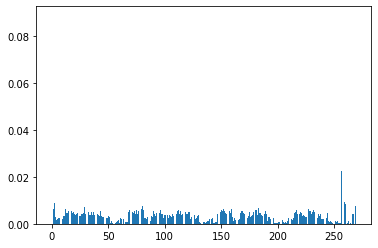

In [86]:
for i,v in enumerate(importance):
 print(f'Feature: {cols[i]} Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [90]:
pca = PCA(n_components=20) # estimate only 2 PCs
X_new = pca.fit_transform(X_scaled) # project the original data into the PCA space

In [91]:
print(pca.explained_variance_ratio_)

[0.13105075 0.12210977 0.04639572 0.04124701 0.04080315 0.03721854
 0.03303809 0.03185895 0.03161302 0.02895935 0.02764791 0.02323056
 0.0216772  0.0214009  0.02108553 0.02071297 0.0198558  0.01913239
 0.01401438 0.01230412]


In [101]:
X = data[["odds_diff", "home_team_pos_str","away_team_pos_str","Pos_diff","strength","away_strength","home_ratio","away_ratio"]]
cols = X.columns
X_mod = np.nan_to_num(X)
X_scaled = MM.fit_transform(X_mod)
model.fit(X_scaled, y)
importance = model.feature_importances_

Feature: odds_diff Score: 0.2746952355673258
Feature: home_team_pos_str Score: 0.019153147018613117
Feature: away_team_pos_str Score: 0.02038731157041838
Feature: Pos_diff Score: 0.025162811555222372
Feature: strength Score: 0.18074693992290491
Feature: away_strength Score: 0.17774428265961414
Feature: home_ratio Score: 0.0
Feature: away_ratio Score: 0.30211027170590127


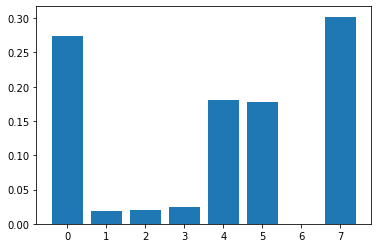

In [102]:
for i,v in enumerate(importance):
 print(f'Feature: {cols[i]} Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [120]:
data_y1= data[data['home_win_flag']==1].reset_index(drop=True)
data_y0= data[data['home_win_flag']==0].reset_index(drop=True)

In [147]:
### home win col 164
data_to_train = pd.concat([data_y1[0:20000],data_y0[0:20000]], ignore_index=True)
X_train = data_to_train[["odds_diff", "home_team_pos_str","away_team_pos_str","Pos_diff","strength","away_strength","home_ratio","away_ratio"]].values
y_train = data_to_train["home_win_flag"].values

In [148]:
data_to_test = pd.concat([data_y1[20000:28000],data_y0[20000:28000]], ignore_index=True)
X_test = data_to_test[["odds_diff", "home_team_pos_str","away_team_pos_str","Pos_diff","strength","away_strength","home_ratio","away_ratio"]].values
y_test = data_to_test["home_win_flag"].values

In [149]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
X_test = MM.fit_transform(X_test)

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [151]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
X_train = MM.fit_transform(X_train)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [152]:
preds = clf.predict(X_test)

In [153]:
from sklearn.metrics import confusion_matrix
import sklearn

In [154]:
sklearn.metrics.confusion_matrix(y_test, preds)

array([[5413, 2587],
       [3581, 4419]])

In [155]:
print (clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6637
0.6145


In [156]:
importance = clf.feature_importances_

Feature: odds_diff Score: 0.5378132269490201
Feature: home_team_pos_str Score: 0.013300575805555182
Feature: away_team_pos_str Score: 0.016340194401124986
Feature: Pos_diff Score: 0.028069135202436035
Feature: strength Score: 0.13342546961126747
Feature: away_strength Score: 0.10633945440493989
Feature: home_ratio Score: 0.00015914776228647748
Feature: away_ratio Score: 0.16455279586336985


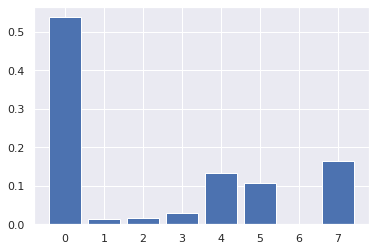

In [157]:
for i,v in enumerate(importance):
 print(f'Feature: {cols[i]} Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [158]:
from keras.models import Sequential
from keras.layers import Dense

In [159]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1152      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [160]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)

Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 0.6569 - accuracy: 0.6077 - val_loss: 0.6475 - val_accuracy: 0.6092
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6444 - accuracy: 0.6200 - val_loss: 0.6460 - val_accuracy: 0.6093
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6432 - accuracy: 0.6217 - val_loss: 0.6447 - val_accuracy: 0.6091
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6431 - accuracy: 0.6222 - val_loss: 0.6525 - val_accuracy: 0.6014
Epoch 5/100
400/400 [==============================] - 2s 4ms/step - loss: 0.6430 - accuracy: 0.6223 - val_loss: 0.6446 - val_accuracy: 0.6089
Epoch 6/100
400/400 [==============================] - 2s 4ms/step - loss: 0.6424 - accuracy: 0.6225 - val_loss: 0.6447 - val_accuracy: 0.6104
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6427 - accuracy: 0.6222 - val_loss: 0.6512 - val_accuracy: 0.6037

[]

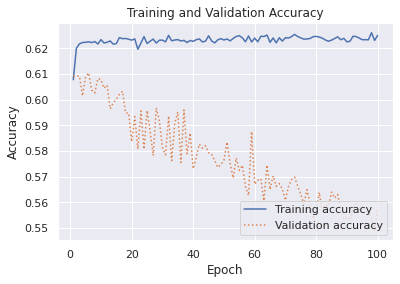

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

500/500 [==============================] - 1s 2ms/step


Text(89.18, 0.5, 'Actual')

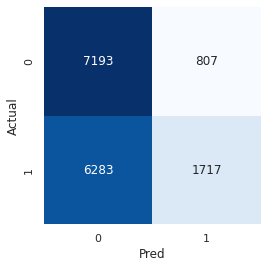

In [162]:
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Pred')
plt.ylabel('Actual')